In [3]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data
tesla_data = yf.download('TSLA', start='2010-01-01', end='2025-01-01')

# Reset the index
tesla_data.reset_index(inplace=True)

# Show the first five rows
tesla_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [4]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Set headers to mimic a browser visit
headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all tables on the page
    tables = soup.find_all('table')

    # Usually the revenue table has a class or is the right index - let's try the first big table
    # Convert it to pandas dataframe
    tesla_revenue = pd.read_html(str(tables[1]))[0]

    # Display last 5 rows
    print(tesla_revenue.tail())

else:
    print(f"Failed to retrieve data, status code: {response.status_code}")


   Tesla Quarterly Revenue (Millions of US $)  \
59                                 2010-06-30   
60                                 2010-03-31   
61                                 2009-12-31   
62                                 2009-09-30   
63                                 2009-06-30   

   Tesla Quarterly Revenue (Millions of US $).1  
59                                          $28  
60                                          $21  
61                                          NaN  
62                                          $46  
63                                          $27  


/tmp/ipykernel_2508/2281552201.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(tables[1]))[0]


In [5]:
import yfinance as yf

# Download GME stock data
gme_data = yf.download('GME', start='2010-01-01', end='2025-06-01')

# Reset the index to turn the Date index into a column
gme_data.reset_index(inplace=True)

# Display first five rows
print(gme_data.head())


[*********************100%***********************]  1 of 1 completed

Price        Date     Close      High       Low      Open     Volume
Ticker                  GME       GME       GME       GME        GME
0      2010-01-04  3.854643  3.863059  3.703150  3.714933   26702800
1      2010-01-05  3.959004  3.996035  3.854642  3.856326   21269600
2      2010-01-06  4.044851  4.056634  3.908507  3.948905   21471200
3      2010-01-07  3.443930  3.563441  3.268872  3.368184  164761200
4      2010-01-08  3.415315  3.573541  3.405216  3.474229   47872400


In [8]:
import yfinance as yf

# Download GME stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603296  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


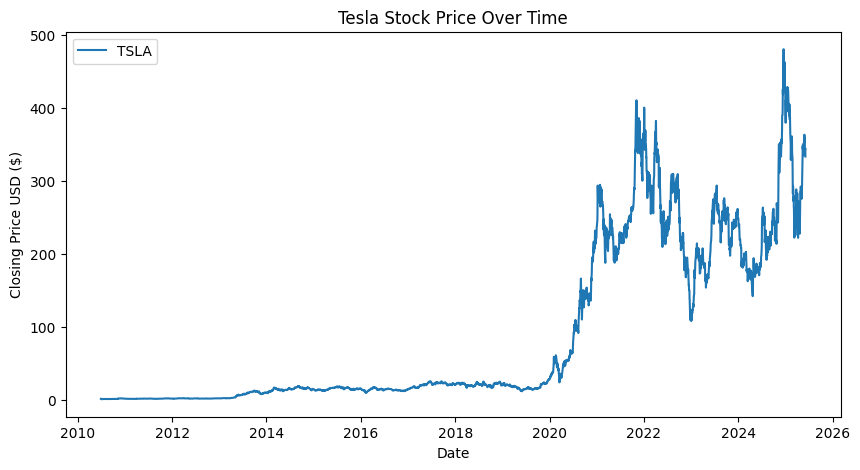

In [9]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(stock_data, stock, title):
    plt.figure(figsize=(10,5))
    plt.plot(stock_data['Date'], stock_data['Close'], label=stock)
    plt.xlabel('Date')
    plt.ylabel('Closing Price USD ($)')
    plt.title(title)
    plt.legend()
    plt.show()

# Download Tesla stock data
tesla = yf.Ticker('TSLA')
tesla_data = tesla.history(period="max")

# Reset index to have 'Date' as a column
tesla_data.reset_index(inplace=True)

# Plot using make_graph function
make_graph(tesla_data, 'TSLA', 'Tesla Stock Price Over Time')


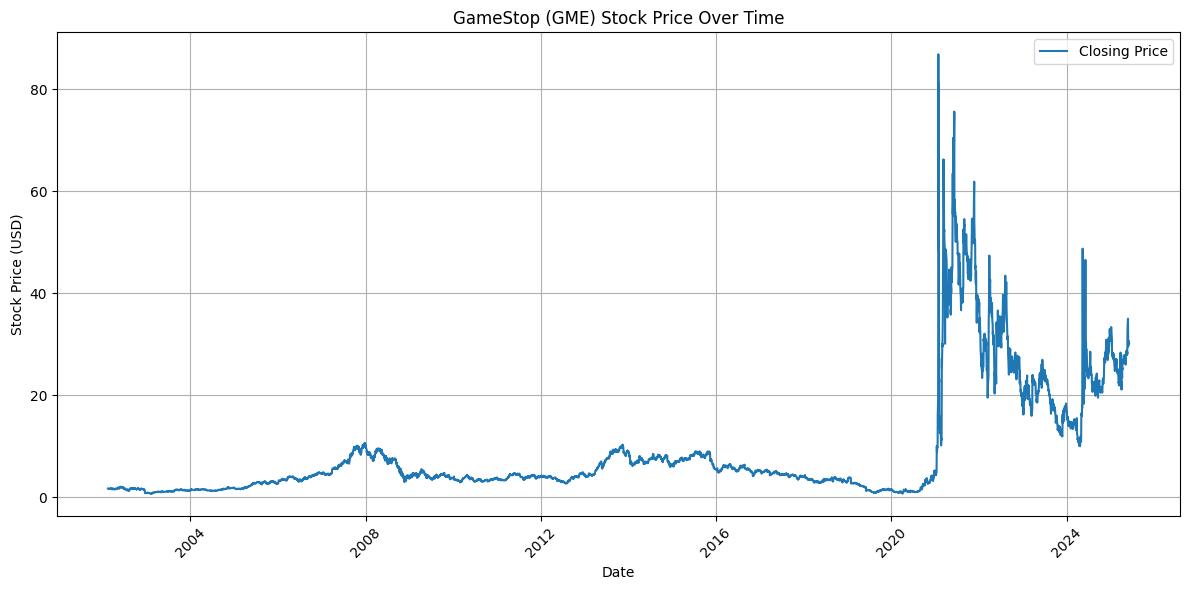

In [10]:
# Assuming you already have gme_data dataframe with stock data loaded

# Example make_graph function (if you don't have it defined, here is a simple version)
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(12,6))
    plt.plot(data['Date'], data['Close'], label='Closing Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function with your GameStop data
make_graph(gme_data, 'GameStop (GME) Stock Price Over Time')
